In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# キノコのCSVファイルを読み込む
df = pd.read_csv('mushrooms.csv')

df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#### 各カラム

* class : pが食用、eが毒キノコ
* cap-shape : カサの形状
* cap-surface : カサの表面
* cap-color : カサの色
* bruises : 斑点があるかないか tがあり、fがなし
* odor : 匂い
* gill-attachment : ひだの付き方
* gill-spacing : ひだの間隔
* gill-size : ひだのサイズ	
* gill-color : ひだの色
* stalk-shape : 柄の形状
* stalk-root : 柄の根
* stalk-surface-above-ring : 柄表面
* stalk-surface-below-ring : 柄
* stalk-color-above-ring : 柄表面の色
* stalk-color-below-ring : 柄の色
* veil-type : つぼの種類
* veil-color : つぼの色
* veil-number : つぼの数
* ring-number : つばの数
* ring-type : つばの種類
* spore-print-color : 胞子の色
* population : 集団形成方法
* habitat : 生息地

In [3]:
missing = df.apply(pd.isnull, axis=0)
missing['count'] = 1
missing.groupby(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 
                                 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 
                                 'stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring',
                                 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
                                 'ring-type', 'spore-print-color', 'population', 'habitat']).sum()

,,,,,,,,,,,,,,,,,,,,,,,count
class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,8124


In [4]:
# データが全部で何件あるのか、そのうち何件が食用、毒キノコか確認する。
print(len(df))
print(df['class'].value_counts())

8124
e    4208
p    3916
Name: class, dtype: int64


毒キノコのがちょっと多いことがわかった       
散布図を表示して相関があるか観察してみる        
各カラムの値が文字なので数値に変換する前処理を行う

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df2 = df.apply(le.fit_transform)
df2.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3


class p が 1, class e が 0 のようだ

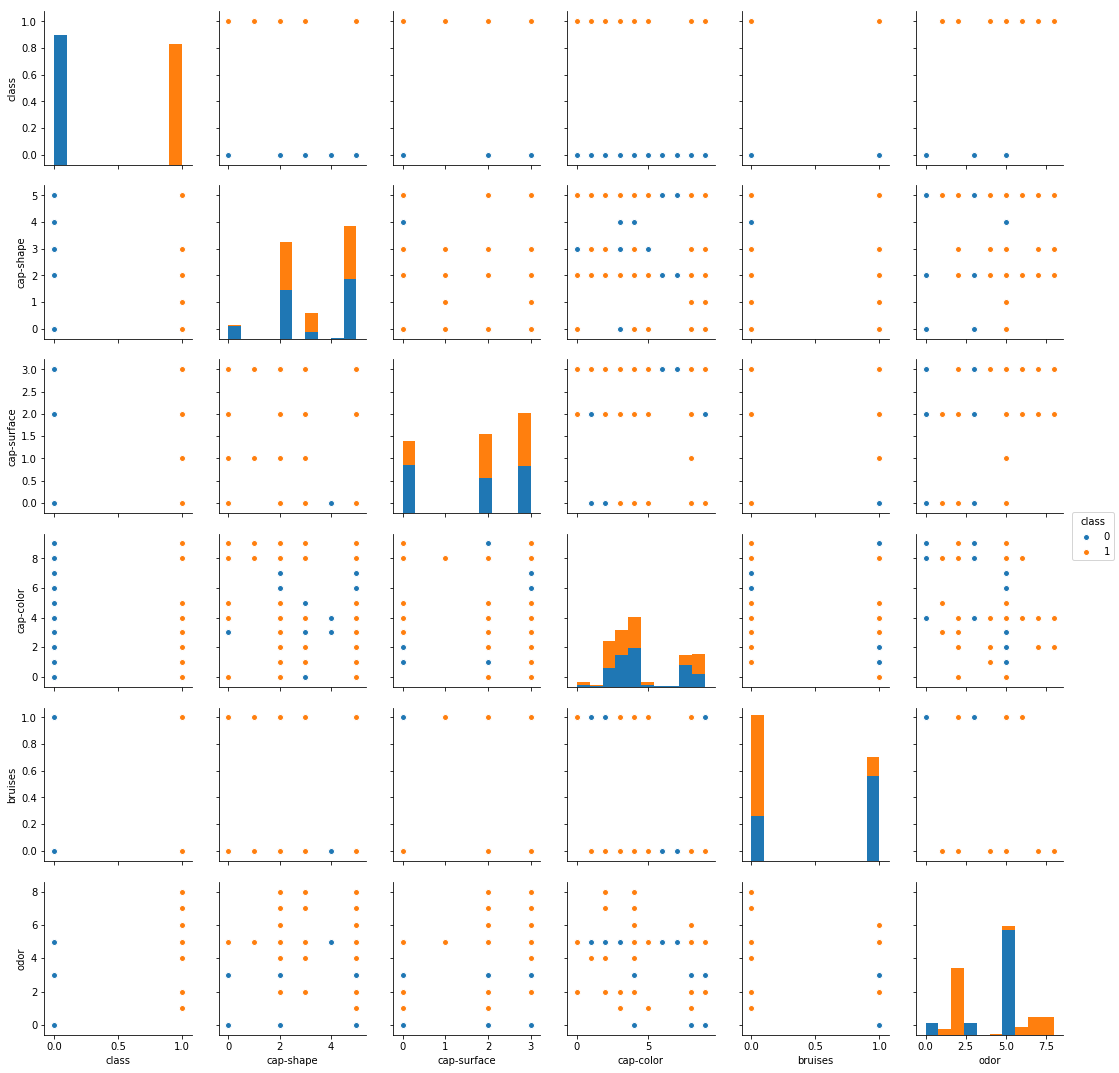

In [6]:
#全特徴を分割して表示する
# 散布図を表示
sns.pairplot(df2[['class', 'cap-shape','cap-surface','cap-color','bruises','odor']], hue='class')
plt.show()

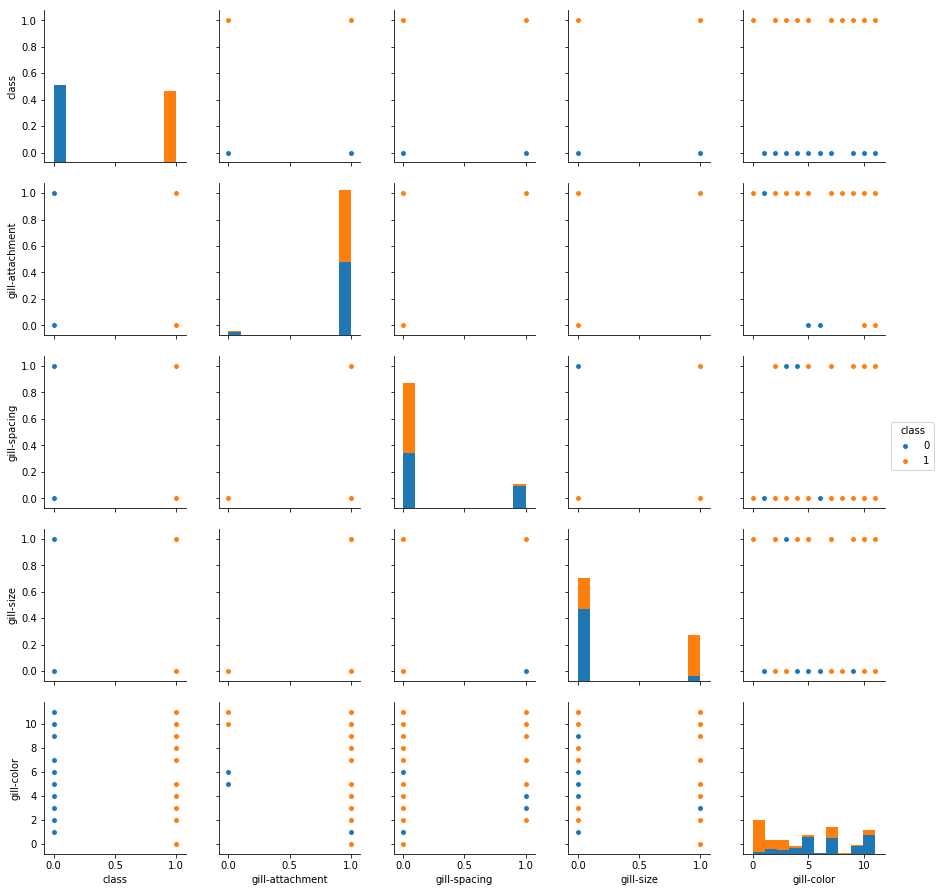

In [7]:
sns.pairplot(df2[['class','gill-attachment', 'gill-spacing', 'gill-size', 'gill-color']], hue='class')
plt.show()

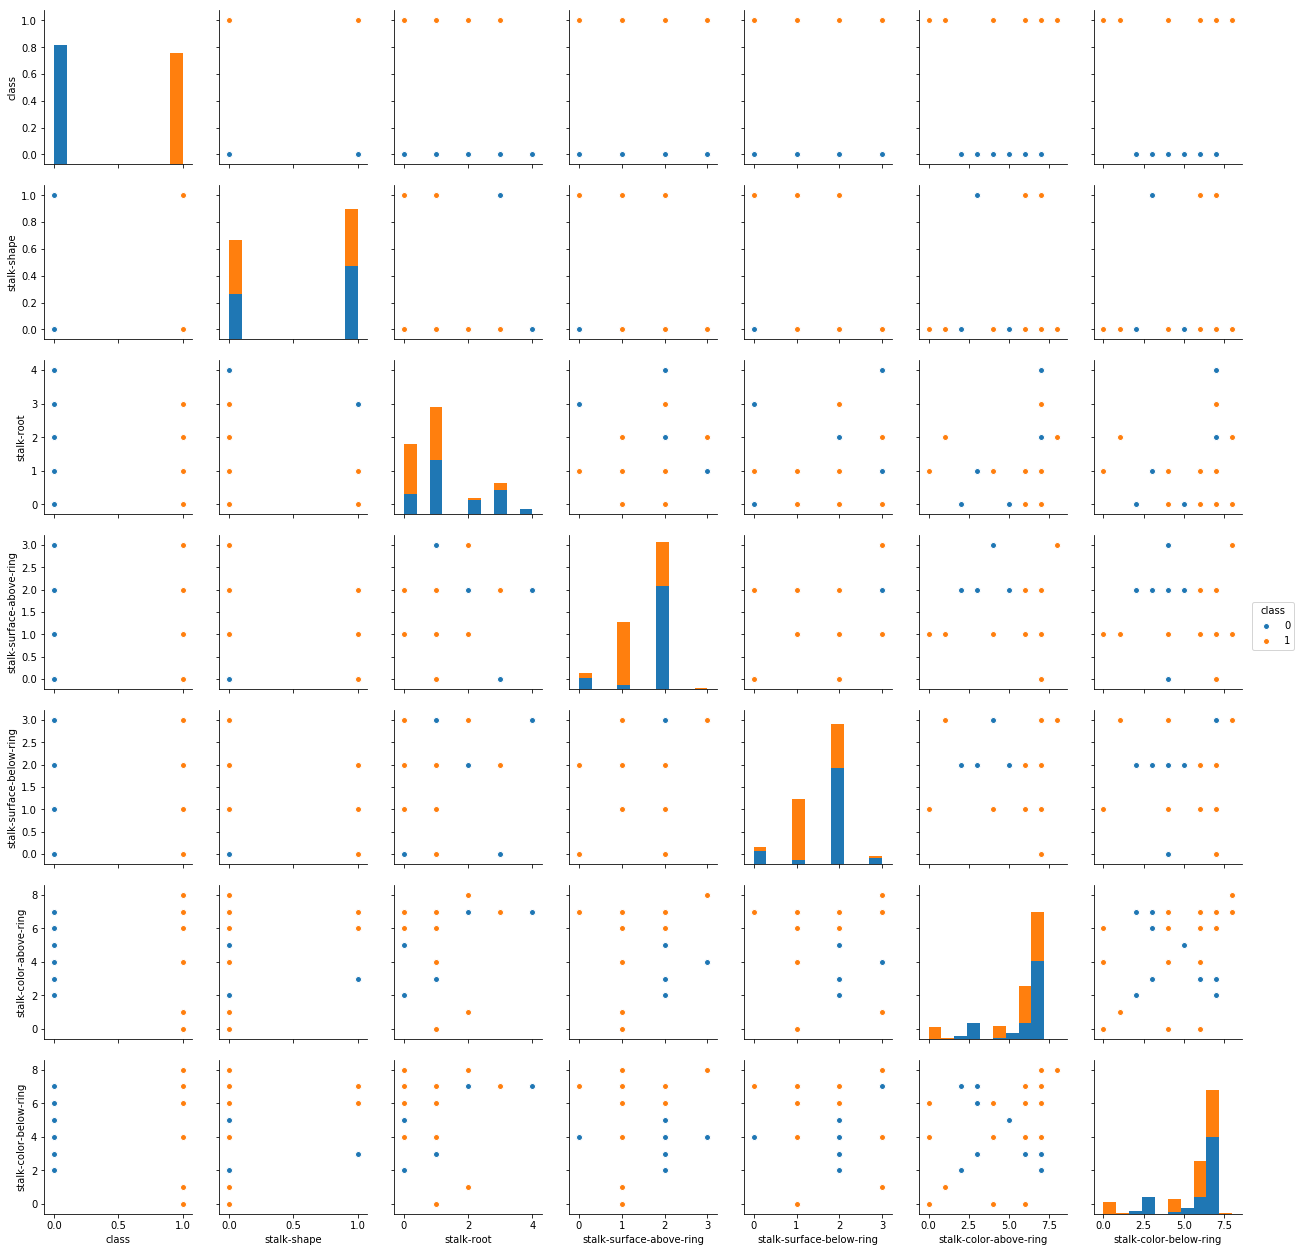

In [8]:
sns.pairplot(df2[['class','stalk-shape','stalk-root','stalk-surface-above-ring',
                  'stalk-surface-below-ring','stalk-color-above-ring', 'stalk-color-below-ring']], hue='class')
plt.show()

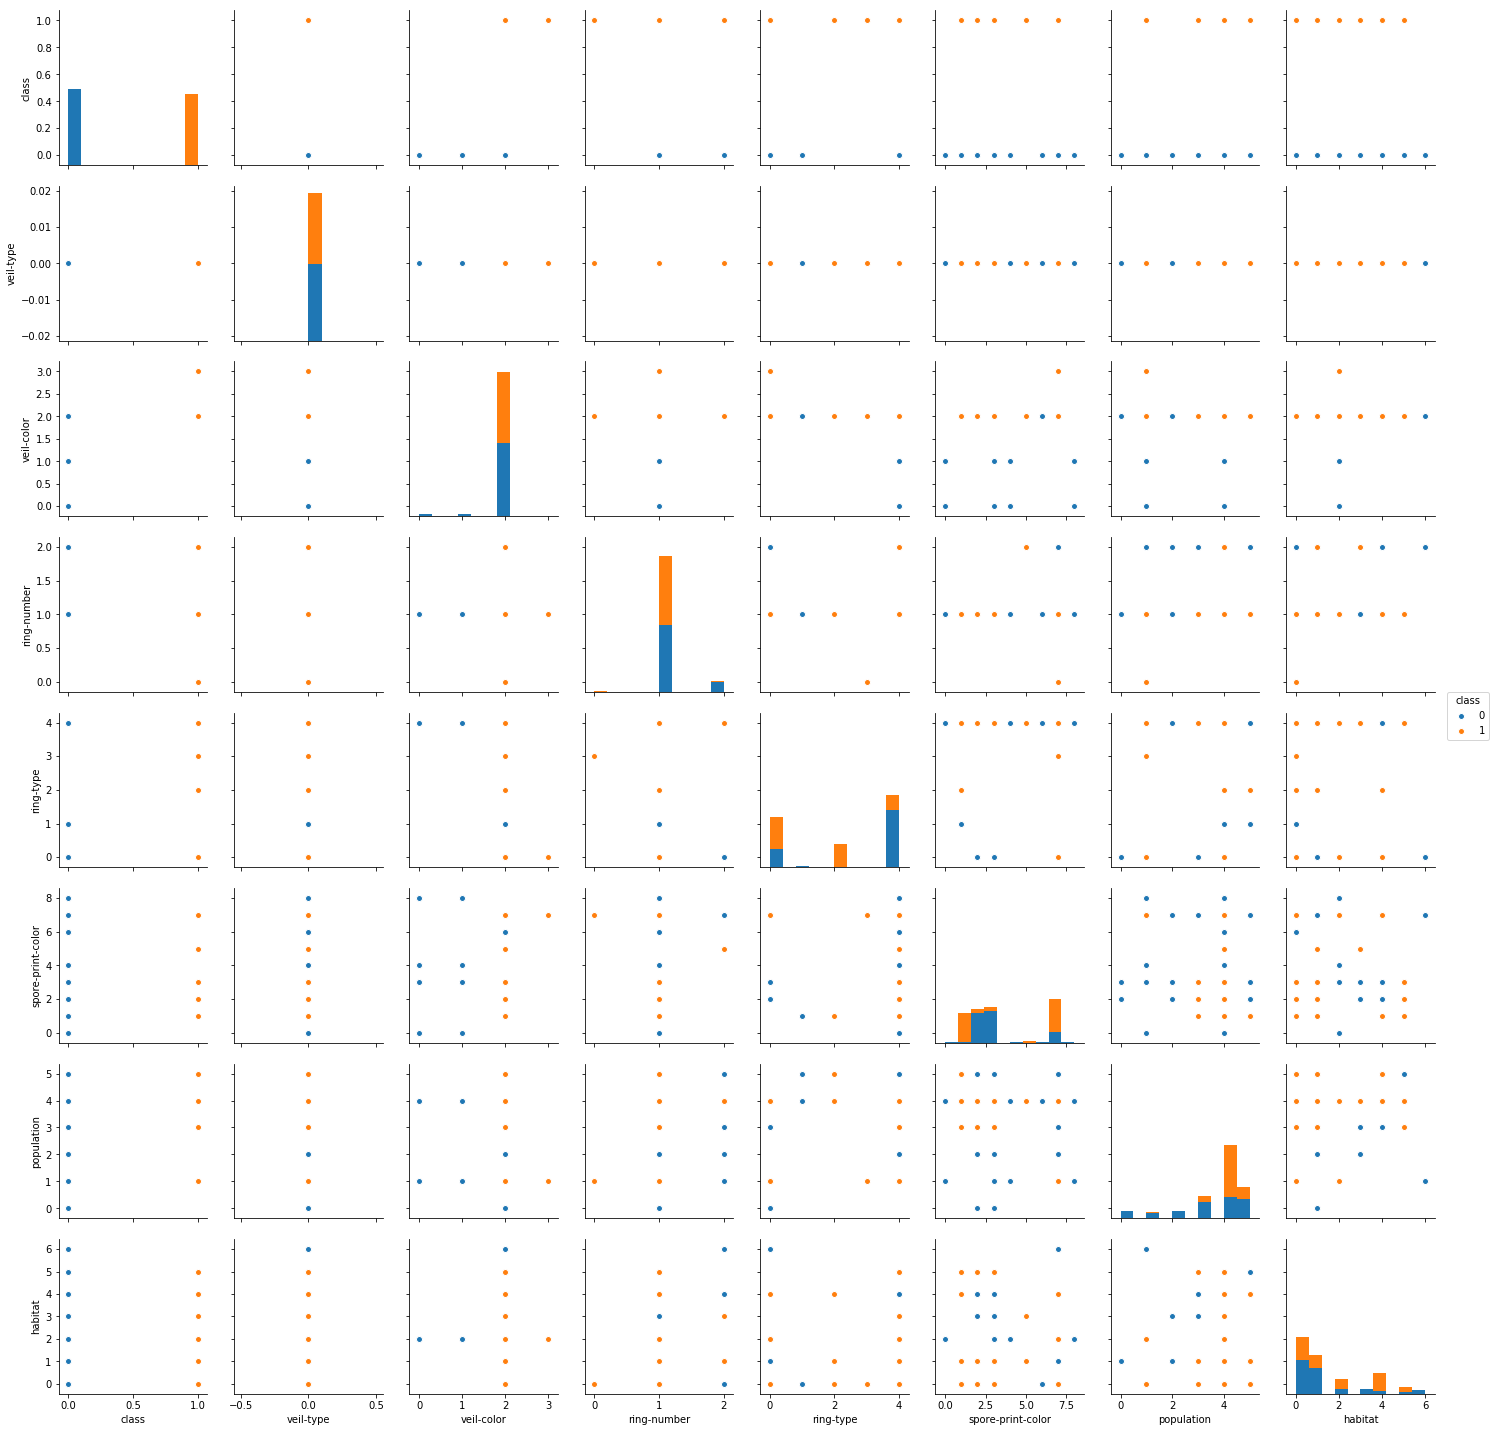

In [9]:
sns.pairplot(df2[['class','veil-type', 'veil-color', 'ring-number','ring-type', 'spore-print-color', 'population', 'habitat']], hue='class')
plt.show()

直感だが cap-shape,bruises, odor, gill-spacing, stalk-surface-below-ring, ring-type, spore-print-color, population 辺りは特徴として使えそうな気がする。       

選択した特徴のエントロピーを計算してみる

In [10]:
# 親のエントロピーを計算する
p0 = len(df2[df2['class']==0]) / len(df2)
p1 = len(df2[df2['class']==1]) / len(df2)

parent_entropy = -(p0*np.log2(p0) + p1*(np.log2(p1)))
print(parent_entropy)

0.999067896872


In [11]:
# cap-shapeのエントロピーを計算する
cap_shape_entropy = []
for i in range(0,6):
    t = df2[df2['cap-shape']==i]
    if not len(t) == 0:
        p0 = (len(t[t['class']==0])+1) / len(t)
        p1 = (len(t[t['class']==1])+1)/ len(t)
        entropy = -(p0*np.log2(p0) + p1*(np.log2(p1)))
        cap_shape_entropy.append(entropy)
        
# cap-shapeでのIGを求める
e=0
for i in range(0,6):
    e += (len(df2[df2['cap-shape']==i])/len(df2))*cap_shape_entropy[i]
    
cap_shape_IG = parent_entropy - e

In [12]:
# bruisesのエントロピーを計算する
bruises_entropy = []
for i in range(0,2):
    t = df2[df2['bruises']==i]
    if not len(t) == 0:
        p0 = (len(t[t['class']==0])+1) / len(t)
        p1 = (len(t[t['class']==1])+1)/ len(t)
        entropy = -(p0*np.log2(p0) + p1*(np.log2(p1)))
        bruises_entropy.append(entropy)

# bruisesでのIGを求める
e=0
for i in range(0,2):
    e += (len(df2[df2['bruises']==i])/len(df2))*cap_shape_entropy[i]
    
bruises_IG = parent_entropy - e
print(bruises_IG)

0.672473137039


In [13]:
# odorのエントロピーを計算する
odor_entropy = []
for i in range(0,8):
    t = df2[df2['odor']==i]
    if not len(t) == 0:
        p0 = (len(t[t['class']==0])+1) / len(t)
        p1 = (len(t[t['class']==1])+1)/ len(t)
        entropy = -(p0*np.log2(p0) + p1*(np.log2(p1)))
        odor_entropy.append(entropy)

# odorでのIGを求める
e=0
for i in range(0,2):
    e += (len(df2[df2['odor']==i])/len(df2))*odor_entropy[i]
    
odor_IG = parent_entropy - e
print(odor_IG)

0.99742611004


In [14]:
# gill-spacingのエントロピーを計算する
gill_spacing_entropy = []
for i in range(0,2):
    t = df2[df2['gill-spacing']==i]
    if not len(t) == 0:
        p0 = (len(t[t['class']==0])+1) / len(t)
        p1 = (len(t[t['class']==1])+1)/ len(t)
        entropy = -(p0*np.log2(p0) + p1*(np.log2(p1)))
        gill_spacing_entropy.append(entropy)

# gill-spacingでのIGを求める
e=0
for i in range(0,2):
    e += (len(df2[df2['gill-spacing']==i])/len(df2))*gill_spacing_entropy[i]
    
gill_spacing_IG = parent_entropy - e
print(gill_spacing_IG)

0.100892965703


In [15]:
# stalk-surface-below-ringのエントロピーを計算する
sta_sur_be_ring_entropy = []
for i in range(0,2):
    t = df2[df2['stalk-surface-below-ring']==i]
    if not len(t) == 0:
        p0 = (len(t[t['class']==0])+1) / len(t)
        p1 = (len(t[t['class']==1])+1)/ len(t)
        entropy = -(p0*np.log2(p0) + p1*(np.log2(p1)))
        sta_sur_be_ring_entropy.append(entropy)

# gill-spacingでのIGを求める
e=0
for i in range(0,2):
    e += (len(df2[df2['stalk-surface-below-ring']==i])/len(df2))*sta_sur_be_ring_entropy[i]
    
sta_sur_be_ring_IG = parent_entropy - e
print(sta_sur_be_ring_IG)

0.844598950237


In [16]:
# ring-typeのエントロピーを計算する
ring_type_entropy = []
for i in range(0,5):
    t = df2[df2['ring-type']==i]
    if not len(t) == 0:
        p0 = (len(t[t['class']==0])+1) / len(t)
        p1 = (len(t[t['class']==1])+1)/ len(t)
        entropy = -(p0*np.log2(p0) + p1*(np.log2(p1)))
        ring_type_entropy.append(entropy)

# gill-spacingでのIGを求める
e=0
for i in range(0,2):
    e += (len(df2[df2['ring-type']==i])/len(df2))*ring_type_entropy[i]
    
ring_type_IG = parent_entropy - e
print(ring_type_IG)

0.675664459481


In [17]:
# spore-print-colorのエントロピーを計算する
sp_pr_color_entropy = []
for i in range(0,9):
    t = df2[df2['spore-print-color']==i]
    if not len(t) == 0:
        p0 = (len(t[t['class']==0])+1) / len(t)
        p1 = (len(t[t['class']==1])+1)/ len(t)
        entropy = -(p0*np.log2(p0) + p1*(np.log2(p1)))
        sp_pr_color_entropy.append(entropy)

# gill-spacingでのIGを求める
e=0
for i in range(0,2):
    e += (len(df2[df2['spore-print-color']==i])/len(df2))*sp_pr_color_entropy[i]
    
sp_pr_color_IG = parent_entropy - e
print(sp_pr_color_IG)

0.959829076596


In [18]:
# populationのエントロピーを計算する
population_entropy = []
for i in range(0,6):
    t = df2[df2['population']==i]
    if not len(t) == 0:
        p0 = (len(t[t['class']==0])+1) / len(t)
        p1 = (len(t[t['class']==1])+1)/ len(t)
        entropy = -(p0*np.log2(p0) + p1*(np.log2(p1)))
        population_entropy.append(entropy)

# gill-spacingでのIGを求める
e=0
for i in range(0,2):
    e += (len(df2[df2['population']==i])/len(df2))*population_entropy[i]
    
population_IG = parent_entropy - e
print(population_IG)

0.972354604848


In [19]:
print("cap-shapeIG : "+str(cap_shape_IG))
print("bruisesIG : "+str(bruises_IG))
print("odorIG : "+str(odor_IG))
print("gill-spacingIG : "+str(gill_spacing_IG))
print("stalk-surface-below-ringIG : "+str(sta_sur_be_ring_IG))
print("ring-typeIG : "+str(ring_type_IG))
print("spore-print-colorIG : "+str(sp_pr_color_IG))
print("populationIG : "+str(population_IG))

cap-shapeIG : 0.0485394483901
bruisesIG : 0.672473137039
odorIG : 0.99742611004
gill-spacingIG : 0.100892965703
stalk-surface-below-ringIG : 0.844598950237
ring-typeIG : 0.675664459481
spore-print-colorIG : 0.959829076596
populationIG : 0.972354604848


各IGの値をみる限り、cap-shape、gill-spacing は特徴としてあまり使えなさそうだ。         
ついでなのでIGが一番高い odor の食用と毒キノコの割合がどれくらいか見ておこう

In [34]:
count_odor = df2.groupby(['odor','class']).size().reset_index(name='count')
count_odor

,odor,class,count
0,0,0,400
1,1,1,192
2,2,1,2160
3,3,0,400
4,4,1,36
5,5,0,3408
6,5,1,120
7,6,1,256
8,7,1,576
9,8,1,576


odorの種類 5 にだけ、食用と毒キノコが2つが混ざっているのがわかる。       
当然のようにodorの各種類に含まれる食用の割合はこうなる

In [36]:
odor_detail = pd.pivot_table(count_odor, index=['odor'], columns='class', values='count').reset_index()
odor_detail['average'] = odor_detail[1] / (odor_detail[1] + odor_detail[0])
odor_detail

class,odor,0,1,average
0,0,400.0,NaN,NaN
1,1,NaN,192.0,NaN
2,2,NaN,2160.0,NaN
3,3,400.0,NaN,NaN
4,4,NaN,36.0,NaN
5,5,3408.0,120.0,0.034014
6,6,NaN,256.0,NaN
7,7,NaN,576.0,NaN
8,8,NaN,576.0,NaN


キノコの判定に使えそうな特徴をいくつか発見できたので、モデルの構築を行う。          
まず使う特徴だけのデータフレームを作り、トレーニング用のCSVファイルとして保存する。        

In [39]:
train_df = pd.DataFrame()
train_df['class'] = df2[['class']].apply(le.fit_transform)
train_df['bruises'] = df2[['bruises']].apply(le.fit_transform)
train_df['odor'] = df2[['odor']].apply(le.fit_transform)
train_df['stalk-surface-below-ring'] = df2[['stalk-surface-below-ring']].apply(le.fit_transform)
train_df['ring-type'] = df2[['ring-type']].apply(le.fit_transform)
train_df['spore-print-color'] = df2[['spore-print-color']].apply(le.fit_transform)
train_df['population'] = df2[['population']].apply(le.fit_transform)
train_df.head(5)

,class,bruises,odor,stalk-surface-below-ring,ring-type,spore-print-color,population
0,1,1,6,2,4,2,3
1,0,1,0,2,4,3,2
2,0,1,3,2,4,3,2
3,1,1,6,2,4,2,3
4,0,0,5,2,0,3,0


In [40]:
# train_dfをCSVファイルとして保存する
train_df.to_csv('new_mushrooms.csv')